In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from imblearn.over_sampling import SMOTE
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, classification_report, auc


warnings.filterwarnings('ignore')

2024-08-21 10:29:36.893658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 10:29:36.893789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 10:29:37.015100: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# loading dataset
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# shape
df.shape

(284807, 31)

In [4]:
# features
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# null data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Fraud & Legit Transaction Analysis
fraud_and_legit = df.groupby(by='Class').mean()
fraud_and_legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


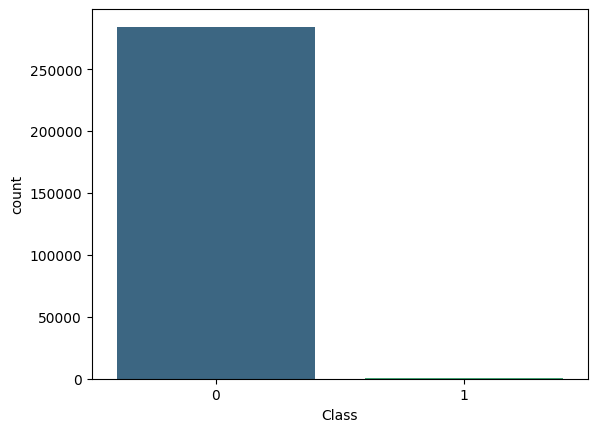

In [9]:
# plotting dependent features
sns.countplot(data=df, x='Class', palette='viridis')
plt.show()

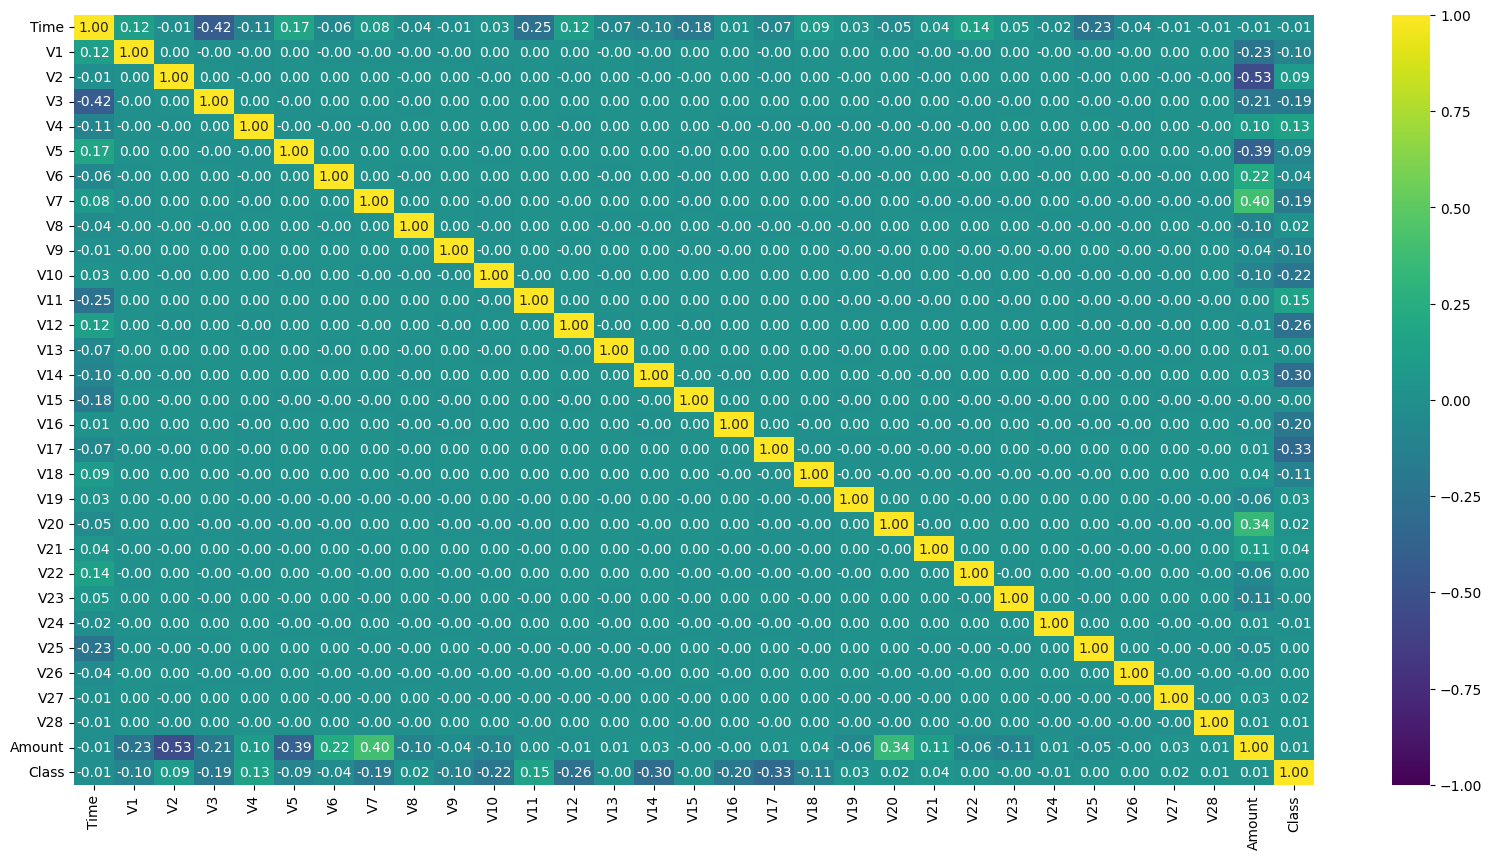

In [10]:
# Correlaion Matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='viridis',cbar = True, annot=True, fmt='.2f',vmax=1, vmin=-1)
plt.show()

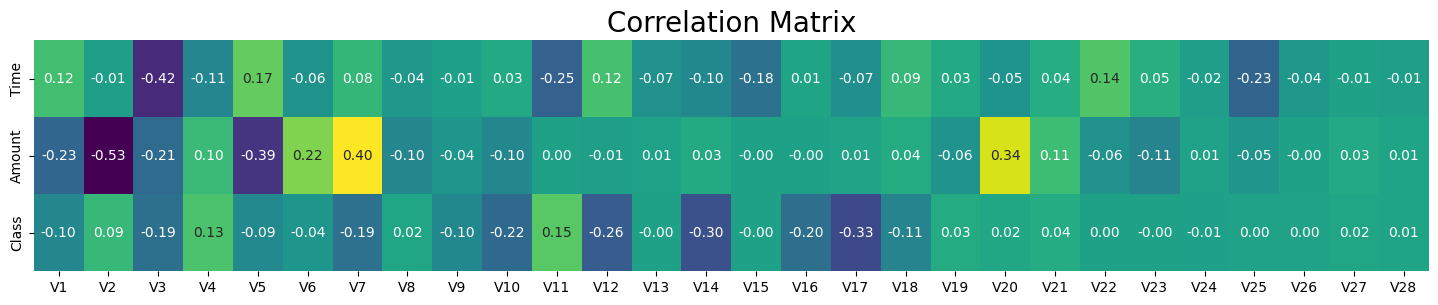

In [11]:
# Correlation Matrix with desired features
corr = df.corr().loc[['Time', 'Amount', 'Class'], df.columns[1:-2]]
plt.figure(figsize=(18, 3))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', cbar=False)
plt.title("Correlation Matrix", size=20)
plt.show()

In [12]:
corr.T[(corr.T['Class']<-0.12) | (corr.T['Class']>0.12)]

,Time,Amount,Class
V3,-0.419618,-0.210880,-0.192961
V4,-0.105260,0.098732,0.133447
V7,0.084714,0.397311,-0.187257
V10,0.030617,-0.101502,-0.216883
V11,-0.247689,0.000104,0.154876
V12,0.124348,-0.009542,-0.260593
V14,-0.098757,0.033751,-0.302544
V16,0.011903,-0.003910,-0.196539
V17,-0.073297,0.007309,-0.326481


In [13]:
# Selecting K Best Features
features = df.drop(columns=['Class'])
target = df['Class']

selector = SelectKBest(score_func=f_classif, k=9)
selector.fit(features, target)

selected_features = features.columns[selector.get_support()]

print(f"Selected features: {selected_features}")

Selected features: Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


In [14]:
# updating dataframe for selected features
df = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']]
df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


In [15]:
# Split Dependent & Independent Features And Applying SMOTE (Synthetic Minority Over-sampling Technique)
X = df.drop('Class', axis=1) 
y = df['Class']

smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),
                          pd.Series(y_resampled, name='Class')], 
                          axis=1)

df_resampled['Class'].value_counts()

Class
0    284315
1    142157
Name: count, dtype: int64

In [16]:
# splitting training & testing data into 75% - 25% 
X = df_resampled.drop(columns = ['Class'], axis=1)
y = df_resampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [17]:
# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32,
                    validation_data=(X_test, y_test), 
                    verbose=1)

# Predict and evaluate
predictions = model.predict(X_test)
y_pred_classes = (predictions > 0.5).astype(int).flatten()  

Epoch 1/10
  91/9996 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6622 - loss: 0.5012

I0000 00:00:1724236201.660612      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9996/9996 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9585 - loss: 0.1092 - val_accuracy: 0.9812 - val_loss: 0.0489
Epoch 2/10
9996/9996 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9859 - loss: 0.0397 - val_accuracy: 0.9912 - val_loss: 0.0283
Epoch 3/10
9996/9996 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9932 - val_loss: 0.0216
Epoch 4/10
9996/9996 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9942 - val_loss: 0.0185
Epoch 5/10
9996/9996 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9930 - val_loss: 0.0211
Epoch 6/10
9996/9996 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9950 - val_loss: 0.0154
Epoch 7/10
9996/9996 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9946 - val_loss: 0.0165
Epoch 8/10
9996/9996 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9952 - loss: 0.0150 - val

In [18]:
# Compute ROC AUC score using continuous predictions
roc_auc = roc_auc_score(y_test, predictions)

# Compute accuracy, precision, recall using binary class predictions
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

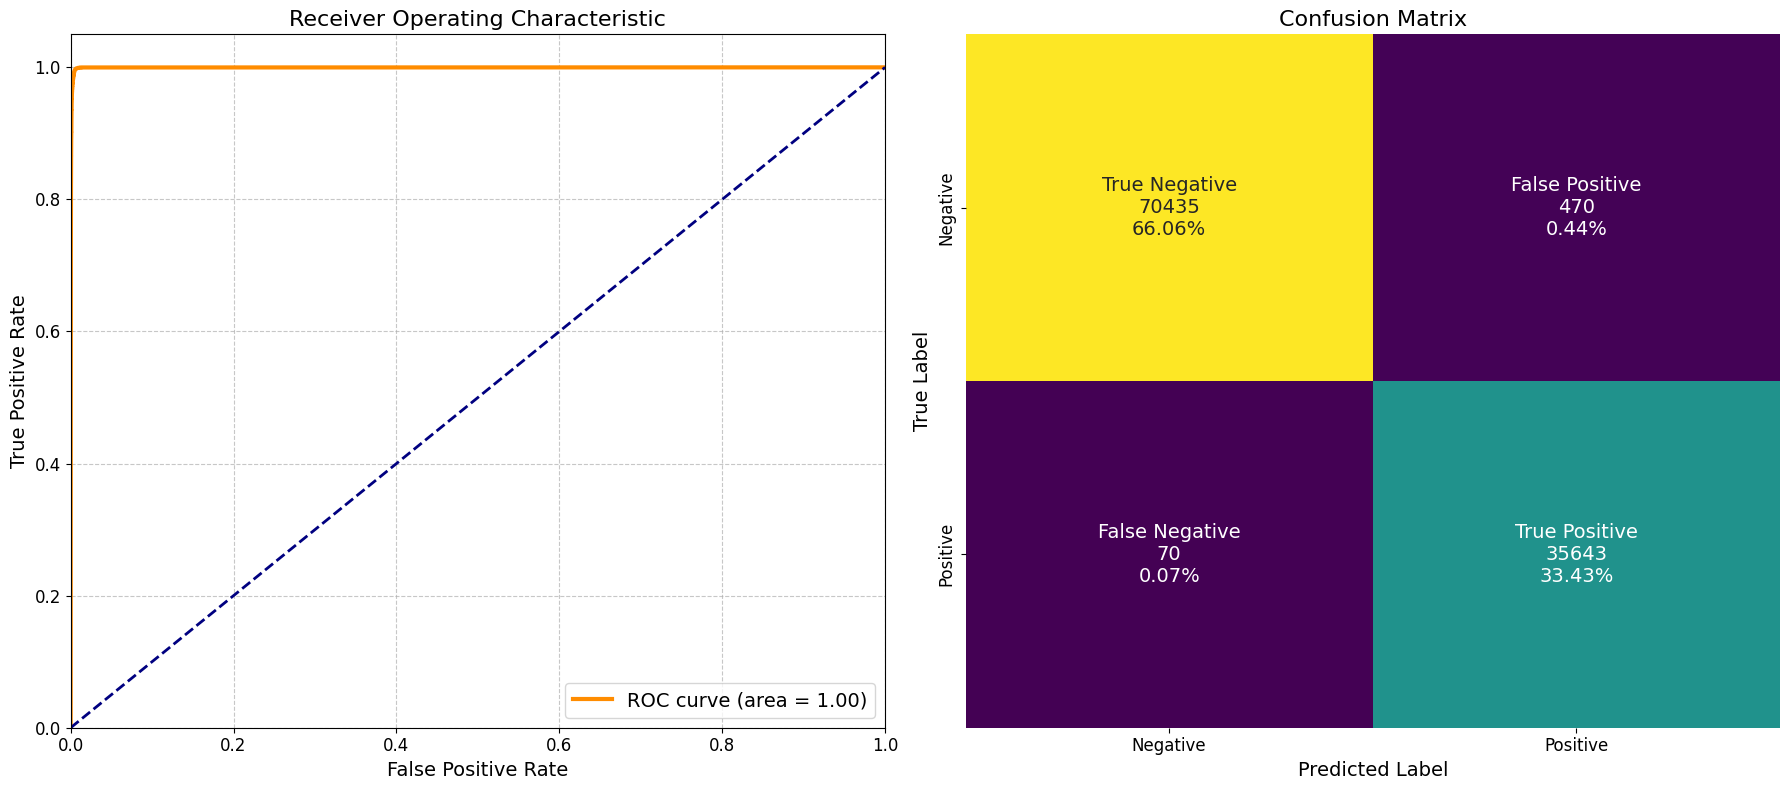

In [19]:
# Create the first figure with performance indicators
fig = make_subplots(rows=1, cols=4, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])

# Accuracy gauge
fig.add_trace(go.Indicator(mode="gauge+number", value=round(accuracy * 100, 2), title={'text': "Accuracy", 'font': {'size': 14}},gauge={'axis': {'range': [None, 100]}}), row=1, col=1)

# Roc Auc gauge
fig.add_trace(go.Indicator(mode="gauge+number",value=round(roc_auc* 100, 2),title={'text': "Roc-Auc", 'font': {'size': 14}},gauge={'axis': {'range': [None, 100]}}), row=1, col=2)

# Precision gauge
fig.add_trace(go.Indicator(mode="gauge+number",value=round(precision * 100, 2),title={'text': "Precision", 'font': {'size': 14}},gauge={'axis': {'range': [None, 100]}}), row=1, col=3)

# Recall gauge
fig.add_trace(go.Indicator(mode="gauge+number",value=round(recall * 100, 2),title={'text': "Recall", 'font': {'size': 14}},gauge={'axis': {'range': [None, 100]}}), row=1, col=4)

#Updating the Layout
fig.update_layout(title_text="🎯 Model Performance Metrics",title_x=0.5, height=250, width=950,showlegend=False,)
fig.show()



# ROC Curve
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot ROC Curve
axs[0].plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (area = {roc_auc:.2f})')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate', fontsize=14)
axs[0].set_ylabel('True Positive Rate', fontsize=14)
axs[0].set_title('Receiver Operating Characteristic', fontsize=16)
axs[0].legend(loc='lower right', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Plot Confusion Matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='viridis', cbar=False, ax=axs[1], annot_kws={"size": 14})

# Styling for Confusion Matrix
axs[1].set_title('Confusion Matrix', fontsize=16)
axs[1].set_xlabel('Predicted Label', fontsize=14)
axs[1].set_ylabel('True Label', fontsize=14)
axs[1].set_xticklabels(['Negative', 'Positive'], fontsize=12)
axs[1].set_yticklabels(['Negative', 'Positive'], fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()